# **Assignment 1** 
# Srujana Vanka  - 2020102005


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing librabies
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline
from google.colab.patches import cv2_imshow 
import math
import time 

# Question 7


# 7.1 -  Linear Spatial Filters

## 7.1.1

### Part 1

Text(0.5, 1.0, 'Simple Mean Filter (3x3)')

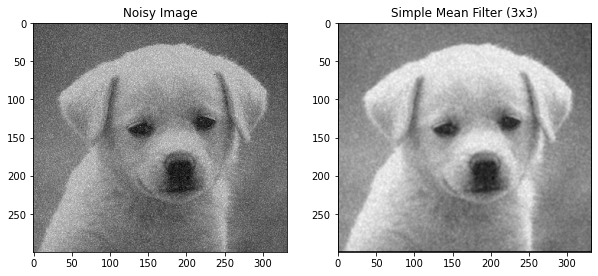

In [ ]:
# Simple mean filter
def meanFilter(k):
  mean_filter = np.full((k, k), 1/(k*k))
  return mean_filter
  
def convolution(img, k):
    im = img.astype(np.float64)
    k = k.astype(np.float64)

    # Extract the heights and width of the image
    h,w=im.shape
    dimension = k.shape[0]
    output = np.zeros(im.shape)
    size1=int(dimension/2)
    size2=int((dimension-1)/2)

    # Iterate over every pixel that can be covered by the mask
    for i in range(size1, h-size2):
        for j in range(size1, w-size2):
            output[i][j] = max(0, sum(sum(k*im[i-size1:i+size2+1, j-size1:j+size2+1])))
    return output.astype(np.uint8)

noisy_img =cv2.imread("/content/drive/My Drive/images/noise.png",0)
mean_filter = meanFilter(3)
filter_img = (convolution(noisy_img,mean_filter))

# Plotting
plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')

plt.subplot(122)
plt.imshow(filter_img, cmap='gray')
plt.title('Simple Mean Filter (3x3)')



### Part 2

Text(0.5, 1.0, 'Efficient Mean Filter (3x3)')

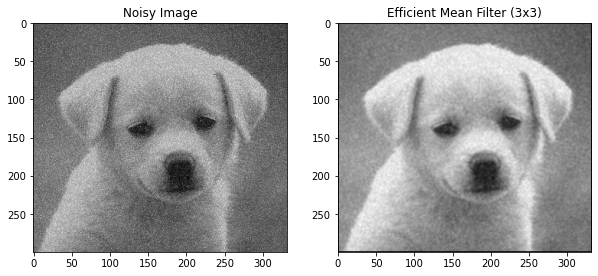

In [ ]:
def effMeanFilter(img,k):
  # Extract the heights and width of the image
  h,w=img.shape
  size=k
  output=np.zeros(img.shape)
  c1=np.zeros(img.shape)
  c2=np.zeros(img.shape)
  pad=size//2

  # Iterate over every pixel that can be covered by the mask
  for i in range(h):
    c1[i,0] = img[i,0]
    for j in range(1, size):
      c1[i,j] = c1[i,j-1]+img[i,j]
    for j in range(size, w):
      c1[i,j] = c1[i,j-1]-img[i,j-size]+img[i,j]
  for i in range(w):
    c2[0,i] = c1[0,i]
    for j in range(1,size):
      c2[j,i]=c2[j-1,i]+c1[j,i]
    for j in range(size, h):
      c2[j,i] = c2[j-1,i]-c1[j-size,i]+c1[j,i]
  for i in range(int(size/2), h-int(size/2)):
    for j in range(int(size/2), w-int(size/2)):
      output[i,j] = c2[i+int(size/2),j+int(size/2)]/(size**2)
  return output

noisy_img=cv2.imread("/content/drive/My Drive/images/noise.png",0)
filter_img = (effMeanFilter(noisy_img,3))

# Plotting
plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')

plt.subplot(122)
plt.imshow(filter_img, cmap='gray')
plt.title('Efficient Mean Filter (3x3)')

### Part 3

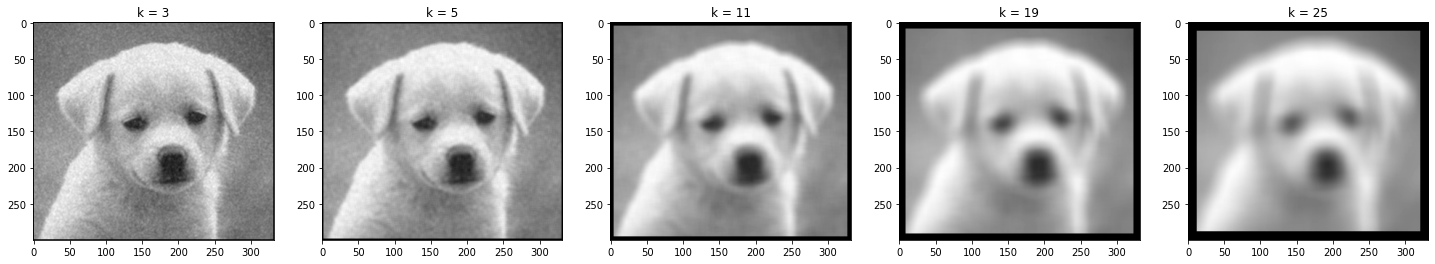

In [ ]:
# Simple mean filter
kernel = [3,5,11,19,25]
simple_time = []

f, array = plt.subplots(1,len(kernel),figsize = (25,25))

for i,k in enumerate(kernel):
    start_time = time.time()
    filter_img = (convolution(noisy_img,meanFilter(k)))
    total_time = (time.time() - start_time)
    simple_time.append(total_time)
    array[i].title.set_text('k = {}'.format(k))
    array[i].imshow(filter_img, cmap='gray')
plt.show()

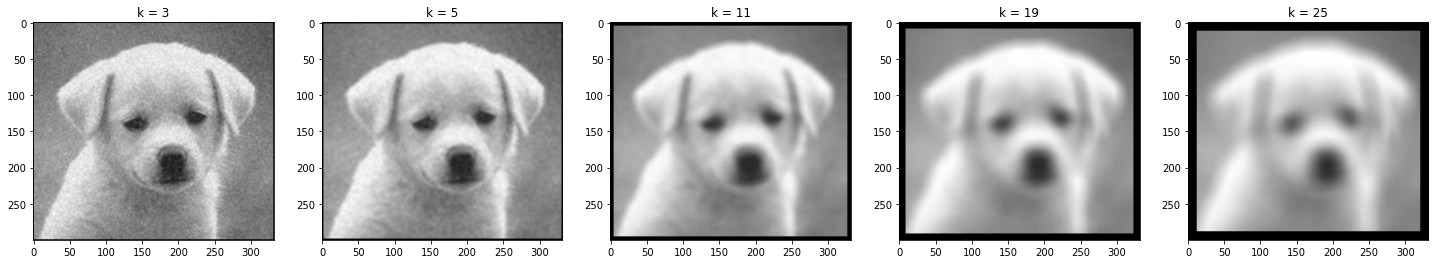

In [ ]:
# Efficient mean filter
kernel = [3,5,11,19,25]
eff_time = []

f, array = plt.subplots(1,len(kernel),figsize = (25,25))

for i,k in enumerate(kernel):
    start_time = time.time()
    filter_img = (effMeanFilter(noisy_img,k))
    total_time = (time.time() - start_time)
    eff_time.append(total_time)
    array[i].title.set_text('k = {}'.format(k))
    array[i].imshow(filter_img, cmap='gray')
plt.show()

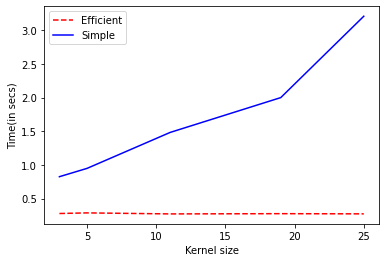

In [ ]:
plt.plot(kernel,eff_time,'r--',label='Efficient')
plt.plot(kernel,simple_time,'b-',label='Simple')
plt.xlabel('Kernel size')
plt.ylabel('Time(in secs)')
plt.gca().legend()
plt.show()

### Part 4

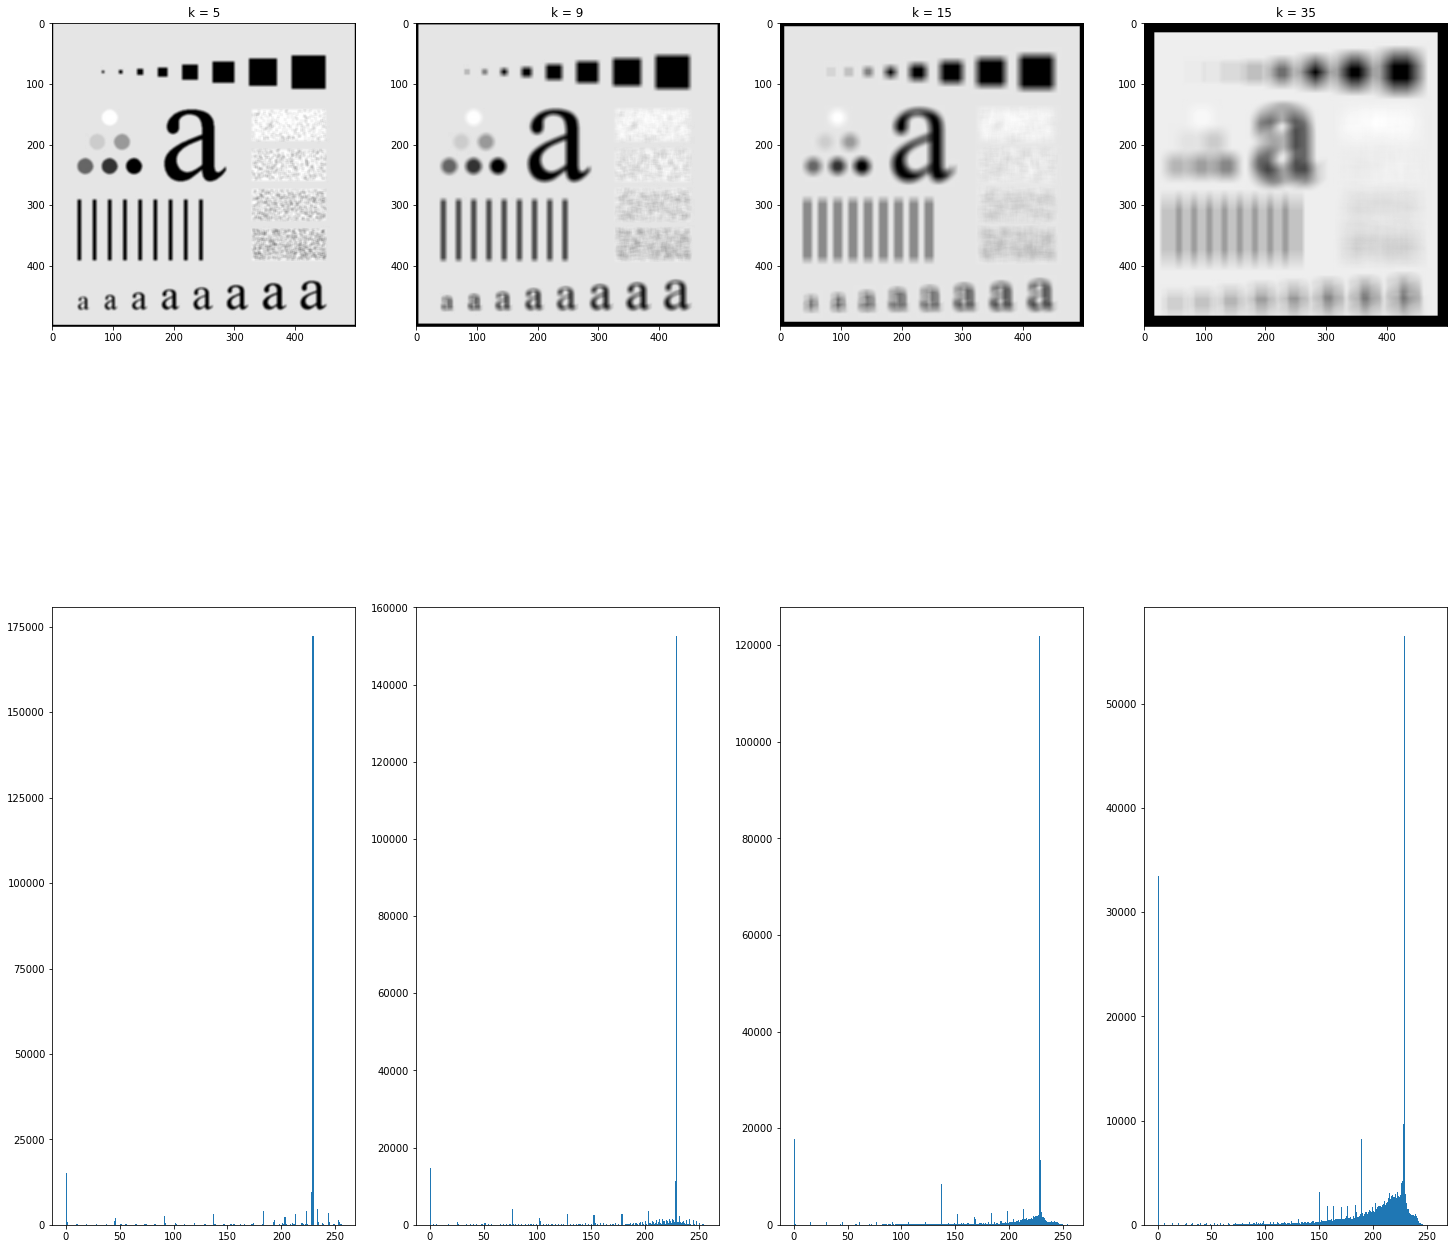

In [ ]:
# Simple mean filter on testPattern.jpg
test_img=cv2.imread("/content/drive/My Drive/images/testPattern.jpg",0)
kernel = [5,9,15,35]
simple_time = []

f, array = plt.subplots(2,len(kernel),figsize = (25,25))
# x = 1
for i,k in enumerate(kernel):
    start_time = time.time()
    mean_filter = meanFilter(k)
    filter_img = (convolution(test_img,mean_filter))
    total_time = (time.time() - start_time)
    simple_time.append(total_time)
    array[0][i].title.set_text('k = {}'.format(k))
    array[0][i].imshow(filter_img, cmap='gray')
    array[1][i].hist(filter_img.ravel(),256,[0,256]) 
plt.show()

From the histograms we observe that as kernel size increases, noise increases.As the kernel size increases, we can see that the image gets blurry. This happens because as the size increases the pixels taken into account do not impact the input image.

The number of valid pixels decreases as well which inturn reduces the resolution of the image and the valid pixels are lost in the filtering.

## 7.1.2 - Gaussian Filter

### Part 1 - a

In [ ]:
def approx1DGaussFilter1(k):
    o = 1
    gaussian1d = []
    gaussian1d.append(o)
    for i in range (1,k):
        temp = (o*(k-i))//i
        gaussian1d.append(temp)
        o = temp
    norm = np.sum(gaussian1d)
    gauss = gaussian1d/norm

    # Standard dev
    mid = (gauss[k//2])/sum(gauss)
    sigma = 1/(((2*np.pi)**0.5)*mid)

    return gauss, sigma

Text(0, 0.5, ' Estimated standard deviation ')

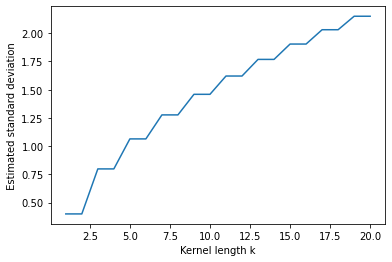

In [ ]:
k = np.linspace(1, 20, 20)
y=[]
for i in range(20):
    g,sigma = approx1DGaussFilter1(i)
    y.append(sigma)

plt.plot(k, y)
plt.xlabel("Kernel length k")
plt.ylabel(" Estimated standard deviation ")

### Part 1 - b

In [ ]:
val1 = int(1.5*sigma) # 86.64% area
val2 = int(2.5*sigma) # 98.76% area
val3 = int(3.5*sigma) # 99.95% area
def approx1DGaussFilter2(sigma, val):
    k = 2*val+1
    g = np.linspace(-val,val,k)
    g = np.square(g)
    g = np.exp(-(g)/(2.0*(sigma**2)))
    return g/np.sum(g)

### Part 2 - a

In [ ]:
def gaussKernelGenerator(k,sigma):
    a = int(k/2)
    xx, yy = np.linspace(-a,a,k), np.linspace(-a,a,k)
    x, y = np.meshgrid(xx, yy)
    g = np.exp(-(np.square(x) + np.square(y))/(2.0 * np.square(sigma)))
    return g/np.sum(g)

### Part 2 - b

In [ ]:
def approx2DGaussFilter(sigma):
    gauss1d = approx1DGaussFilter2(sigma,val2) # As it captures 98.76% of the Gaussian
    g_t = np.array(gauss1d).transpose()
    g_2d = np.outer(np.array(gauss1d), g_t)
    return g_2d

### Part 2 - c

# 7.2

In [ ]:
# Min filter
def minfilter(img,k):
    # Creates the shape of the kernel
    size = k*k
    m = int(k/2)
    x = (img.shape[0]+2*m,img.shape[1]+2*m)
    res = np.zeros(x)
    res[m:res.shape[0]-m,m:res.shape[1]-m] = img
    res1 = res.copy()

    # Iterating over all values in the range 
    for i in range(m,res.shape[0]-m):
        for j in range(m,res.shape[1]-m):
            minimum = 255
            for mvx in range(i-m,i+m+1):
                for mvy in range(j-m,j+m+1):
                    minimum = min(res1[mvx][mvy],minimum)
            res[i][j] = minimum
            out = np.rint(res[m:res.shape[0]-m,m:res.shape[1]-m])
    return out.astype('uint8')  

In [ ]:
# Max filter
def maxfilter(img,k):
    # Creates the shape of the kernel
    size = k*k
    m = int(k/2)
    x = (img.shape[0]+2*m,img.shape[1]+2*m)
    res = np.zeros(x)
    res[m:res.shape[0]-m,m:res.shape[1]-m] = img
    res1 = res.copy()

    # Iterating over all values in the range 
    for i in range(m,res.shape[0]-m):
        for j in range(m,res.shape[1]-m):
            maximum = 0
            for mvx in range(i-m,i+m+1):
                for mvy in range(j-m,j+m+1):
                    maximum = max(res1[mvx][mvy],maximum)
            res[i][j] = maximum
            out = np.rint(res[m:res.shape[0]-m,m:res.shape[1]-m])
    return out.astype('uint8')  

In [ ]:
# Median filter
def medianfilter(img,k):
    # Creates the shape of the kernel
    size = k*k
    m = int(k/2)
    x = (img.shape[0]+2*m,img.shape[1]+2*m)
    res = np.zeros(x)
    res[m:res.shape[0]-m,m:res.shape[1]-m] = img
    res1 = res.copy()

    # Iterating over all values in the range 
    for i in range(m,res.shape[0]-m):
        for j in range(m,res.shape[1]-m):
            med = []
            for mvx in range(i-m,i+m+1):
                for mvy in range(j-m,j+m+1):
                    med.append(res1[mvx][mvy])
            med.sort()
            res[i][j] = med[int(size/2)]
            out = np.rint(res[m:res.shape[0]-m,m:res.shape[1]-m])
    return out.astype('uint8')       

### 7.2.1 - part a


The max filter is defined as the maximum of all pixels within a local region of an image. The maximum filter is typically applied to an image to remove negative outlier noise.

The first image has pepper noise which has low intensity pixels, hence max filter is used.

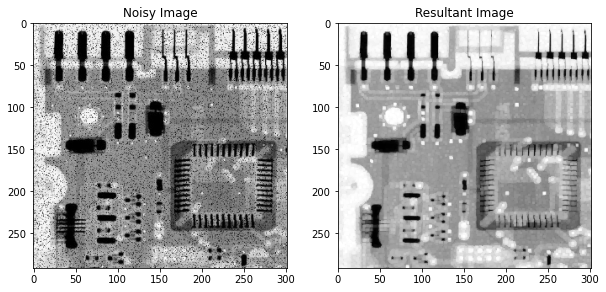

In [ ]:
noisy_img1=cv2.imread("/content/drive/My Drive/images/noisy1.jpeg",0)
filter_img = (maxfilter(noisy_img1,3))

# Plotting
plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(noisy_img1, cmap='gray')
plt.title('Noisy Image')

plt.subplot(122)
plt.imshow(filter_img, cmap='gray')
plt.title('Resultant Image')
plt.imshow(filter_img,cmap = 'gray')

### 7.2.1 - Part b

The minimum filter is defined as the minimum of all pixels within a local region of an image. The minimum filter is typically applied to an image to remove positive outlier noise.

The second image has salt noise which has high intensity noise pixels. Hence min filter is used. 

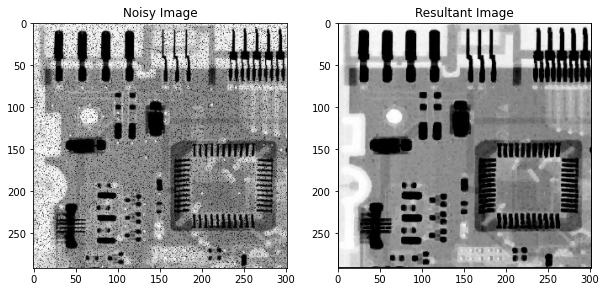

In [ ]:
noisy_img2=cv2.imread("/content/drive/My Drive/images/noisy2.jpeg",0)
filter_img = (minfilter(noisy_img2,3))

# Plotting
plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(noisy_img1, cmap='gray')
plt.title('Noisy Image')

plt.subplot(122)
plt.imshow(filter_img, cmap='gray')
plt.title('Resultant Image')
plt.imshow(filter_img,cmap = 'gray')

### 7.2.1 - Part c

The median filter is the filtering technique used for noise removal from images and signals.
It is used to de-noise salt and pepper noise, which is the 3rd image.

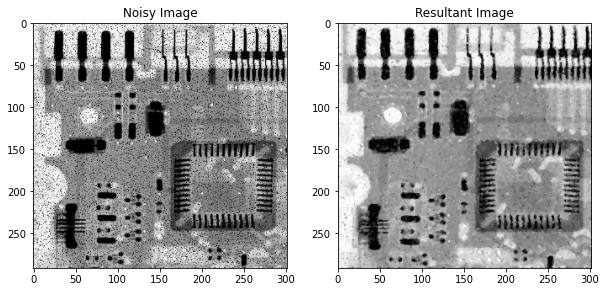

In [ ]:
noisy_img3=cv2.imread("/content/drive/My Drive/images/noisy3.jpeg",0)
filter_img = (medianfilter(noisy_img3,3))

# Plotting
plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(noisy_img1, cmap='gray')
plt.title('Noisy Image')

plt.subplot(122)
plt.imshow(filter_img, cmap='gray')
plt.title('Resultant Image')
plt.imshow(filter_img,cmap = 'gray')

### Part 2

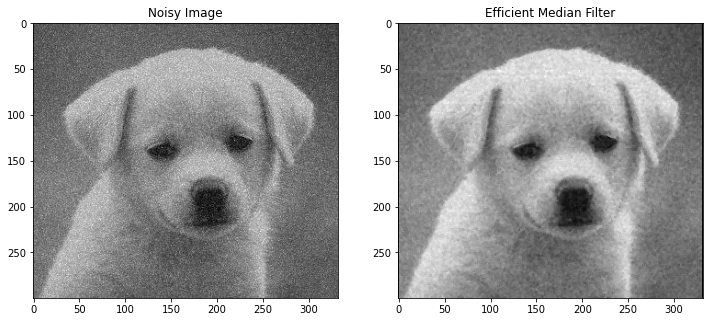

In [ ]:
# Efficient median filter
def effMedianFilter(img,k):

    h,w = img.shape
    
    output = np.zeros([h,w])
    
    padding_img = np.zeros([h+k-1,w+k-1],dtype='int64')
    padding_img[int((k-1)/2):int(h+(k-1)/2),int((k-1)/2):int(w+(k-1)/2)] = img
    
    prev_mem_j = np.zeros(256) # prev avg along horizontal direction (coloumns)
    prev_mem_i = np.zeros(256) # prev avg along horizontal direction (rows)
    

    for i in range(int((k-1)/2),h+int((k-1)/2)):
        if i==int((k-1)/2):
            mem = np.zeros(256)
            for ii in range(k):
                for jj in range(k):
                       mem[padding_img[ii,jj]] +=1
        else:
            mem = np.copy(prev_mem_i)
            for px in padding_img[i-int((k-1)/2)-1:i-int((k-1)/2),0:k]:
                mem[px] -= 1
            for px in padding_img[i+int((k-1)/2):i+int((k-1)/2)+1,0:k]:
                mem[px] += 1
        
        prev_mem_i = np.copy(mem)
        
        for j in range(int((k-1)/2),w+int((k-1)/2)):
            if j == int((k-1)/2):
                mem = np.copy(prev_mem_i)
            else:
                mem = np.copy(prev_mem_j)
                for px in padding_img[i-int((k-1)/2):i+int((k-1)/2)+1,j-int((k-1)/2)-1:j-int((k-1)/2)]:
                    mem[px] -= 1
                for px in padding_img[i-int((k-1)/2):i+int((k-1)/2)+1,j+int((k-1)/2):j+int((k-1)/2)+1]:
                    mem[px] += 1
              
            prev_mem_j = np.copy(mem)
                
            curr_sum = 0
            for ii in range(256):
                curr_sum += mem[ii]
                if curr_sum > int((k*k)/2):
                    output[i-int((k-1)/2),j-int((k-1)/2)] = ii
                    break


    return np.int64(output)



noisy_img=cv2.imread("/content/drive/My Drive/images/noise.png",0)

med_img = effMedianFilter(noisy_img,3)

plt.figure(figsize = (12,10))
plt.subplot(121)
plt.imshow(noisy_img, cmap='gray')
plt.title('Noisy Image')

plt.subplot(122)
plt.imshow(med_img, cmap='gray')
plt.title('Efficient Median Filter')

plt.show()

# 7.3

## 7.3 - Part 1

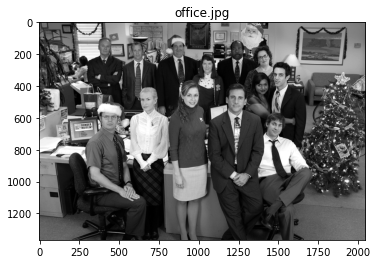

(1366, 2048)

In [ ]:
office = cv2.imread("/content/drive/My Drive/images/office.jpg")
office = cv2.cvtColor(office, cv2.COLOR_BGR2GRAY)
plt.imshow(office, cmap='gray')# Extract the heights and width of the image
plt.title('office.jpg')

plt.show()
office.shape

In [ ]:
def convolve(image,mask):
    i_h,i_w = image.shape             # Extract the heights and width of the image
    k_h,k_w = mask.shape              # Pixels covered by the mask 
    
    output = np.zeros([i_h,i_w])
    
    padding_img = np.zeros([i_h+k_h-1,i_w+k_w-1])
    padding_img[int((k_h-1)/2):int(i_h+(k_h-1)/2),int((k_w-1)/2):int(i_w+(k_w-1)/2)] = image
    
    # Iterate over every pixel that can be covered by the mask
    for i in range(k_h,i_h+k_h):
        for j in range(k_w,i_w+k_w):
            area = padding_img[i-k_h:i,j-k_w:j]
            val = sum(sum(mask*area))
            output[i-k_h,j-k_w] = max(0,val)

    
    return np.int64(output)

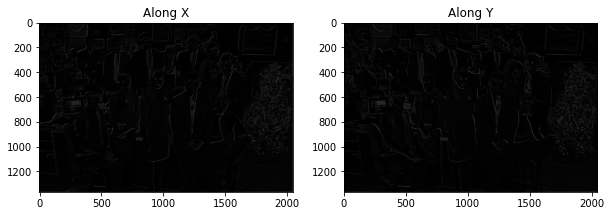

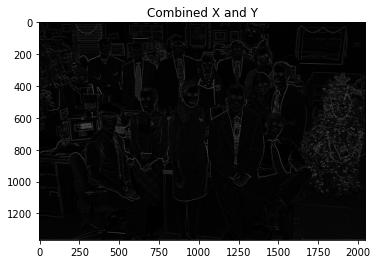

In [ ]:
# (a) Roberts
# Defining the filter
Roberts_Mx = np.array([[0 , 1 ],[ -1 , 0]])
Roberts_My = np.array([[1 , 0 ],[ 0 , -1]])

edges_y = convolve(office,Roberts_Mx)      # Apply the convolution using the vertical mask
edges_x = convolve(office,Roberts_My)      # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

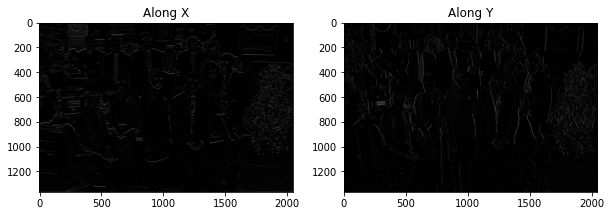

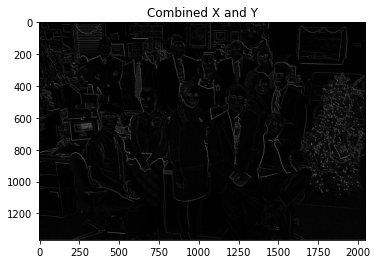

In [ ]:
# (b) Prewitt 
# Defining the filter
Prewitt_Mx = np.array([[-1 , 0 , 1],[-1 , 0 , 1],[-1 , 0 , 1]])
Prewitt_My = np.array([[1 , 1 , 1],[0 , 0 , 0],[-1 , -1 , -1]])

edges_y = convolve(office,Prewitt_Mx)             # Apply the convolution using the vertical mask
edges_x = convolve(office,Prewitt_My)             # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

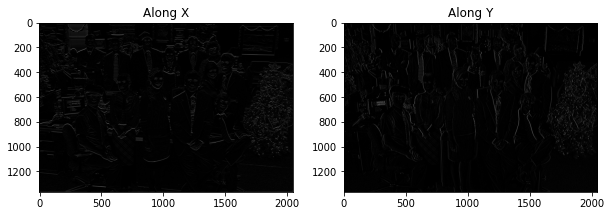

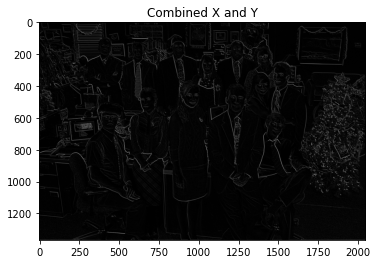

In [ ]:
# (c) Sobel 
# Defining the filter
Sobel_Mx = np.array([[-1 , 0 , 1],[-2 , 0 , 2],[-1 , 0 , 1]])
Sobel_My = np.array([[1 , 2 , 1],[0 , 0 , 0],[-1 , -2 , -1]])

edges_y = convolve(office,Sobel_Mx)           # Apply the convolution using the vertical mask
edges_x = convolve(office,Sobel_My)           # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

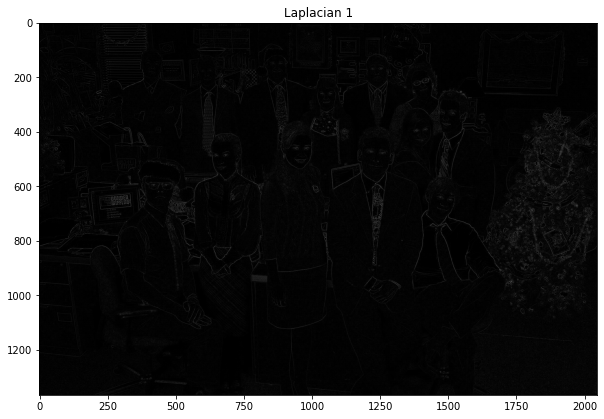

In [ ]:
# (d) Laplacian 1
# Defining the filter
Laplacian_M = np.array([[0 , 1 , 0 ],[ 1 , -4 , 1 ],[0 , 1 , 0 ]])

edges = convolve(office,Laplacian_M)

plt.figure(figsize = (10,9))
plt.imshow(edges,cmap = 'gray')
plt.title('Laplacian 1')
plt.show()

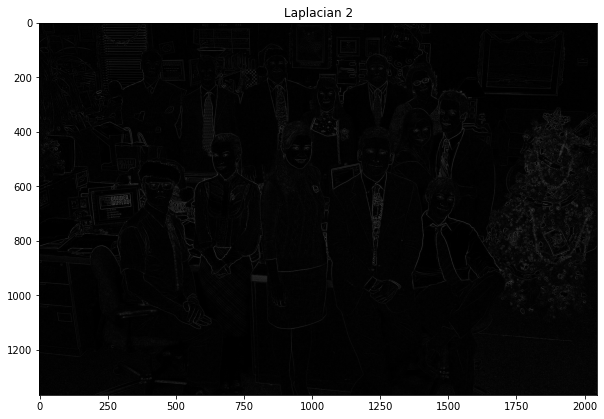

In [ ]:
# (d) Laplacian 2
# Defining the filter
Laplacian_M = np.array([[1 , 1 , 1 ],[ 1 , -8 , 1 ],[1 , 1 , 1 ]])

edges = convolve(office,Laplacian_M)

plt.figure(figsize = (10,9))
plt.imshow(edges,cmap = 'gray')
plt.title('Laplacian 2')
plt.show()

## 7.3 - Part 2

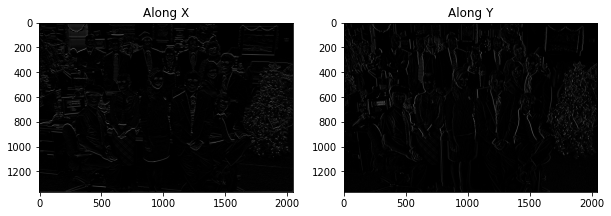

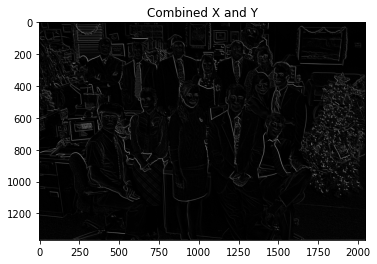

In [ ]:
# Sobel 5×5 variants
# Defining the filter
Sobel_My = np.array([[1,4,6,4,1],[2,8,12,8,2],[0,0,0,0,0],[-2,-8,-12,-8,-2],[-1,-4,-6,-4,-1]])
Sobel_Mx = np.array([[-1,-2,0,2,1],[-4,-8,0,8,4],[-6,-12,0,12,6],[-4,-8,0,8,4],[-1,-2,0,2,1]])

edges_y = convolve(office,Sobel_Mx)           # Apply the convolution using the vertical mask
edges_x = convolve(office,Sobel_My)           # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

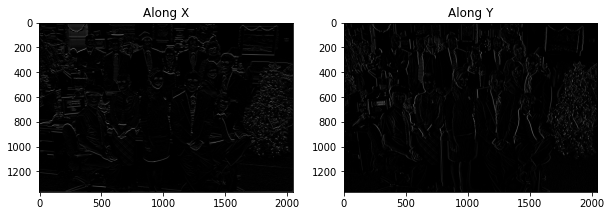

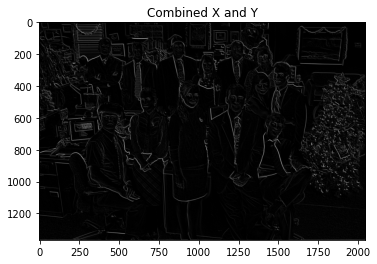

In [ ]:
# Prewitt 5×5 variants
# Defining the filter
Prewitt_My = np.array([[1,1,1,1,1],[1,1,1,1,1],[0,0,0,0,0],[-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1]])
Prewitt_Mx = np.array([[-1,-1,0,1,1],[-1,-1,0,1,1],[-1,-1,0,1,1],[-1,-1,0,1,1],[-1,-1,0,1,1]])

edges_y = convolve(office,Prewitt_Mx)             # Apply the convolution using the vertical mask
edges_x = convolve(office,Prewitt_My)             # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

### Hence, we observe that the output of 5x5 Prewitt and 5x5 Sobel variant filters is similar to their 3x3 variants.

## 7.3 - Part 3

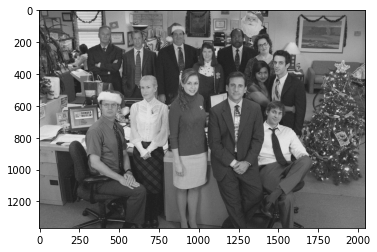

In [ ]:
np.random.seed(42)
noise = np.random.normal(0.0, 10, office.shape)
noise_office =office.astype(np.float64)+noise

plt.imshow(noise_office,cmap='gray')
plt.show()

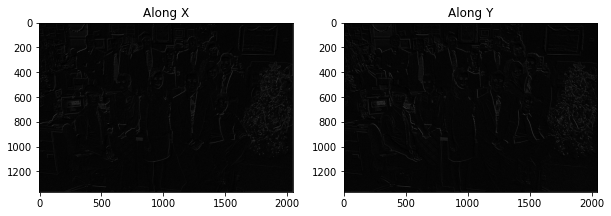

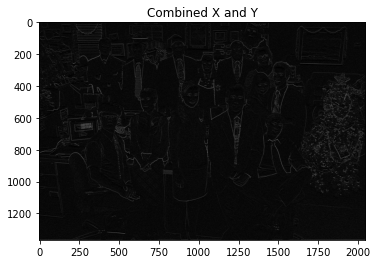

In [ ]:
# Roberts
# Defining the filter
Roberts_Mx = np.array([[0 , 1 ],[ -1 , 0]])
Roberts_My = np.array([[1 , 0 ],[ 0 , -1]])

edges_y = convolve(noise_office,Roberts_Mx)      # Apply the convolution using the vertical mask
edges_x = convolve(noise_office,Roberts_My)      # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

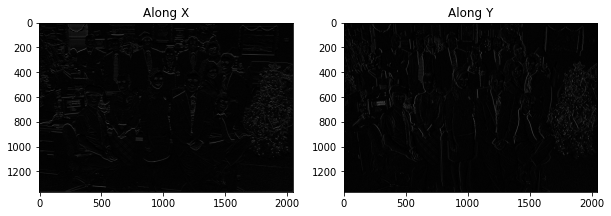

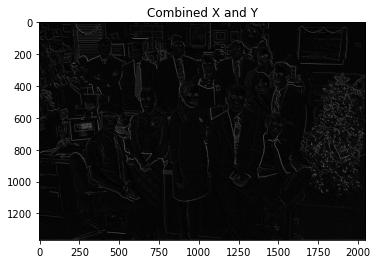

In [ ]:
# Prewitt 3x3
# Defining the filter
Prewitt_Mx = np.array([[-1 , 0 , 1],[-1 , 0 , 1],[-1 , 0 , 1]])
Prewitt_My = np.array([[1 , 1 , 1],[0 , 0 , 0],[-1 , -1 , -1]])

edges_y = convolve(noise_office,Prewitt_Mx)             # Apply the convolution using the vertical mask
edges_x = convolve(noise_office,Prewitt_My)             # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

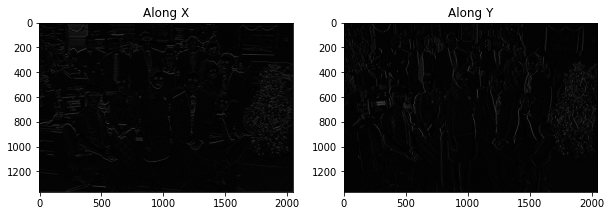

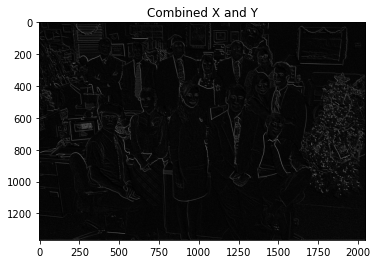

In [ ]:
# Sobel 3x3
# Defining the filter
Sobel_Mx = np.array([[-1 , 0 , 1],[-2 , 0 , 2],[-1 , 0 , 1]])
Sobel_My = np.array([[1 , 2 , 1],[0 , 0 , 0],[-1 , -2 , -1]])

edges_y = convolve(noise_office,Sobel_Mx)           # Apply the convolution using the vertical mask
edges_x = convolve(noise_office,Sobel_My)           # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

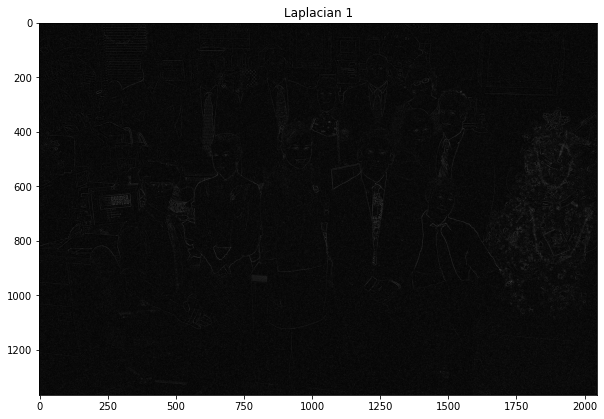

In [ ]:
# Laplacian 1
# Defining the filter
Laplacian_M = np.array([[0 , 1 , 0 ],[ 1 , -4 , 1 ],[0 , 1 , 0 ]])

edges = convolve(noise_office,Laplacian_M)

plt.figure(figsize = (10,9))
plt.imshow(edges,cmap = 'gray')
plt.title('Laplacian 1')
plt.show()

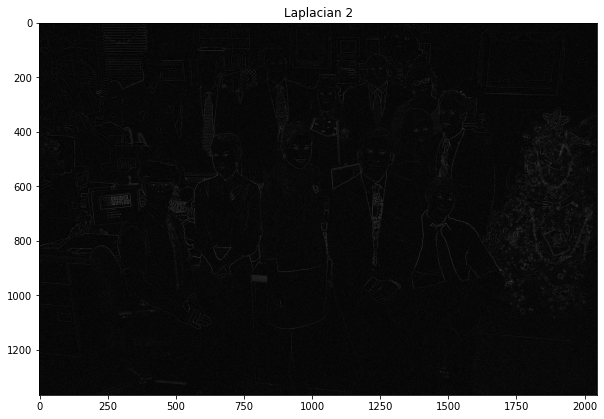

In [ ]:
# Laplacian 2
# Defining the filter
Laplacian_M = np.array([[1 , 1 , 1 ],[ 1 , -8 , 1 ],[1 , 1 , 1 ]])

edges = convolve(noise_office,Laplacian_M)

plt.figure(figsize = (10,9))
plt.imshow(edges,cmap = 'gray')
plt.title('Laplacian 2')
plt.show()

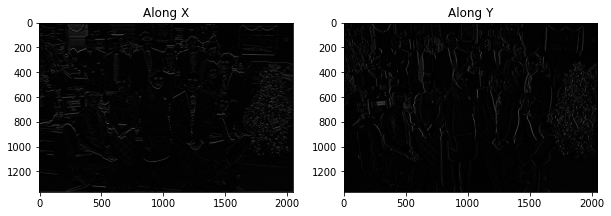

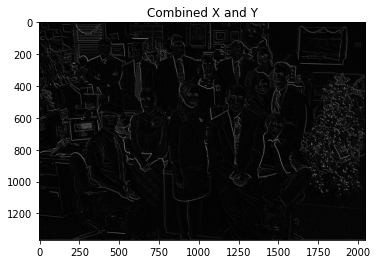

In [ ]:
# Sobel 5×5 variants
# Defining the filter
Sobel_My = np.array([[1,4,6,4,1],[2,8,12,8,2],[0,0,0,0,0],[-2,-8,-12,-8,-2],[-1,-4,-6,-4,-1]])
Sobel_Mx = np.array([[-1,-2,0,2,1],[-4,-8,0,8,4],[-6,-12,0,12,6],[-4,-8,0,8,4],[-1,-2,0,2,1]])

edges_y = convolve(noise_office,Sobel_Mx)           # Apply the convolution using the vertical mask
edges_x = convolve(noise_office,Sobel_My)           # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

In [ ]:
# Prewitt 5×5 variants
# Defining the filter
Prewitt_My = np.array([[1,1,1,1,1],[1,1,1,1,1],[0,0,0,0,0],[-1,-1,-1,-1,-1],[-1,-1,-1,-1,-1]])
Prewitt_Mx = np.array([[-1,-1,0,1,1],[-1,-1,0,1,1],[-1,-1,0,1,1],[-1,-1,0,1,1],[-1,-1,0,1,1]])

edges_y = convolve(noise_office,Prewitt_Mx)             # Apply the convolution using the vertical mask
edges_x = convolve(noise_office,Prewitt_My)             # Apply the convolution using the horizontal mask

plt.figure(figsize = (10,9))
plt.subplot(121)
plt.imshow(edges_x,cmap = 'gray')
plt.title('Along X')
plt.subplot(122)
plt.imshow(edges_y,cmap = 'gray')
plt.title('Along Y')
plt.show()

# Combining both the vertical and horizontal edges (derivatives)
combined = np.int64(np.sqrt(edges_x**2 + edges_y**2))
plt.imshow(combined,cmap='gray')
plt.title('Combined X and Y')
plt.show()

### Hence, we observe that filters like Laplacian are less robust to noise, that is, the output image in the case of noisy images is much worse than the other filters. 